In [1]:
import pm4py
print(pm4py.__version__)

1.2.12


In [2]:
file_path = r'D:\jupyter files\data_waiting_time_project\pm4py-ws-master\files\event_logs'

In [3]:
# importing a XES log as an 'EventLog' object
from pm4py.objects.log.importer.xes import factory as xes_importer
log = xes_importer.apply(file_path + "\\running-example.xes")

In [35]:
log[0]

{'attributes': {'startdate': datetime.datetime(2011, 10, 11, 13, 42, 22, 688000, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200))), 'responsible': 'Resource21', 'enddate_planned': datetime.datetime(2011, 12, 6, 13, 41, 31, 788000, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'department': 'General', 'group': 'Group 2', 'concept:name': 'case-10011', 'deadline': datetime.datetime(2011, 12, 6, 13, 41, 31, 788000, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'channel': 'Internet'}, 'events': [{'org:group': 'Group 1', 'concept:instance': 'task-42933', 'org:resource': 'Resource21', 'concept:name': 'Confirmation of receipt', 'time:timestamp': datetime.datetime(2011, 10, 11, 13, 45, 40, 276000, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200))), 'lifecycle:transition': 'complete'}, '..', {'org:group': 'Group 4', 'concept:instance': 'task-47958', 'org:resource': 'Resource21', 'concept:name': 'T02 Check confirmation of receipt', 'time:timestamp'

In [5]:
# importing a CSV as a Pandas dataframe
from pm4py.objects.log.adapters.pandas import csv_import_adapter as csv_importer
df = csv_importer.import_dataframe_from_path(file_path + "\\running-example.csv")

In [6]:
df

,Unnamed: 0,Activity,Costs,Resource,case:concept:name,case:creator,concept:name,org:resource,time:timestamp
0,0,register request,50,Pete,3,Fluxicon Nitro,register request,Pete,2010-12-30 13:32:00+00:00
1,1,examine casually,400,Mike,3,Fluxicon Nitro,examine casually,Mike,2010-12-30 14:06:00+00:00
2,2,check ticket,100,Ellen,3,Fluxicon Nitro,check ticket,Ellen,2010-12-30 15:34:00+00:00
3,3,decide,200,Sara,3,Fluxicon Nitro,decide,Sara,2011-01-06 08:18:00+00:00
4,4,reinitiate request,200,Sara,3,Fluxicon Nitro,reinitiate request,Sara,2011-01-06 11:18:00+00:00
5,5,examine thoroughly,400,Sean,3,Fluxicon Nitro,examine thoroughly,Sean,2011-01-06 12:06:00+00:00
6,6,check ticket,100,Pete,3,Fluxicon Nitro,check ticket,Pete,2011-01-08 10:43:00+00:00
7,7,decide,200,Sara,3,Fluxicon Nitro,decide,Sara,2011-01-09 08:55:00+00:00
8,8,pay compensation,200,Ellen,3,Fluxicon Nitro,pay compensation,Ellen,2011-01-15 09:45:00+00:00
9,9,register request,50,Mike,2,Fluxicon Nitro,register request,Mike,2010-12-30 10:32:00+00:00


In [7]:
# pre-processing log objects: keeping only cases/events of interest
from pm4py.algo.filtering.log.end_activities import end_activities_filter
filtered_log = end_activities_filter.apply(log, ["pay compensation"])
print(len(log), len(filtered_log))

6 3


In [32]:
type(log)

pm4py.objects.log.log.EventLog

In [8]:
# pre-processing dataframe objects: keeping only cases/events of interest
from pm4py.algo.filtering.pandas.end_activities import end_activities_filter as pd_end_activities_filter
filtered_df = pd_end_activities_filter.apply(df, ["pay compensation"])
print(len(df), len(filtered_df), len(df.groupby("case:concept:name")), len(filtered_df.groupby("case:concept:name")))

42 19 6 3


In [9]:
# converting one format to the other
from pm4py.objects.conversion.log import factory as log_conv_factory
conv_log = log_conv_factory.apply(df)
print(len(conv_log))

6


In [10]:
# apply a discovery algorithm (IMDFb) to the EventLog object
from pm4py.algo.discovery.inductive import factory as inductive_miner
# discovers an accepting Petri net
net, im, fm = inductive_miner.apply(log)

In [11]:
# the same exact discovery technique can be applied directly to Pandas dataframes! :)
from pm4py.algo.discovery.inductive import factory as inductive_miner
# discovers an accepting Petri net
net, im, fm = inductive_miner.apply(df)

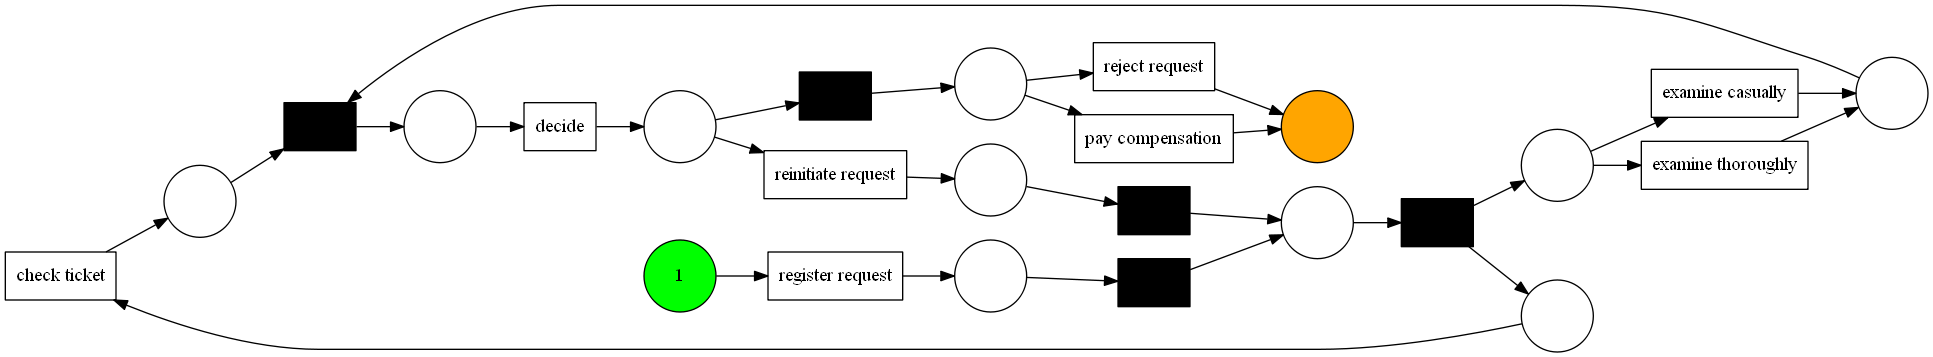

In [12]:
# perform a visualization of the Petri net that is discovered
from pm4py.visualization.petrinet import factory as pn_vis_factory
gviz = pn_vis_factory.apply(net, im, fm)
pn_vis_factory.view(gviz)

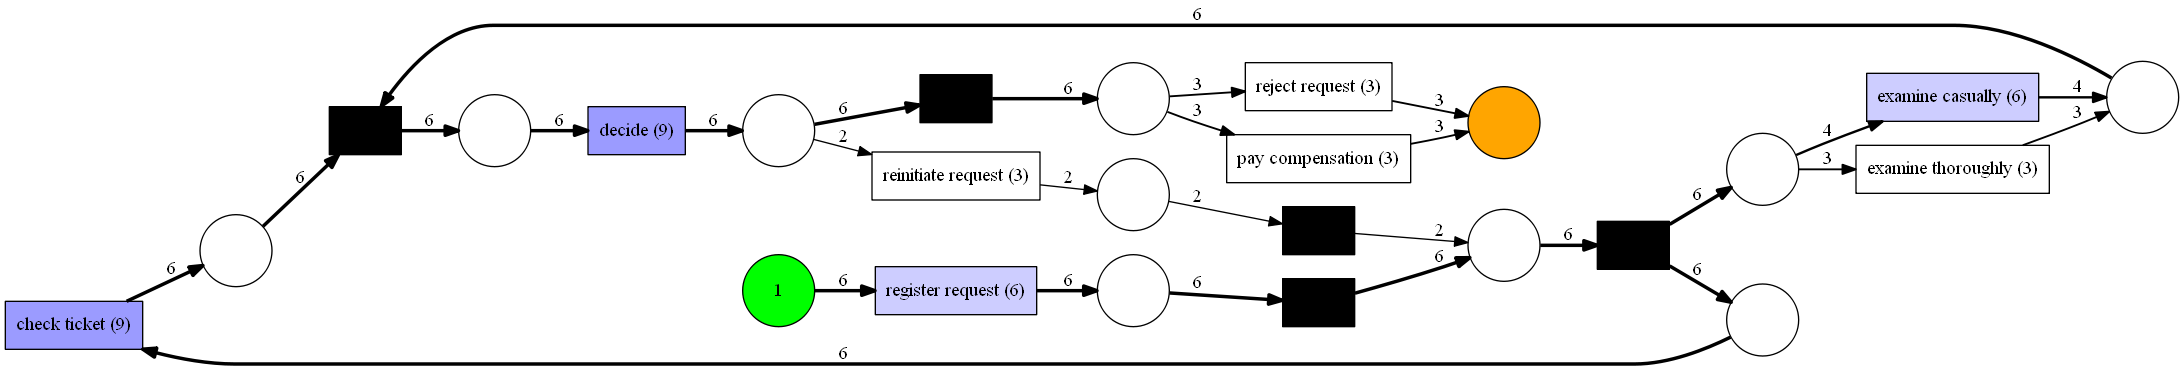

In [13]:
# perform a visualization of the Petri net that is discovered
from pm4py.visualization.petrinet import factory as pn_vis_factory
gviz = pn_vis_factory.apply(net, im, fm, variant="frequency", log=log)
pn_vis_factory.view(gviz)

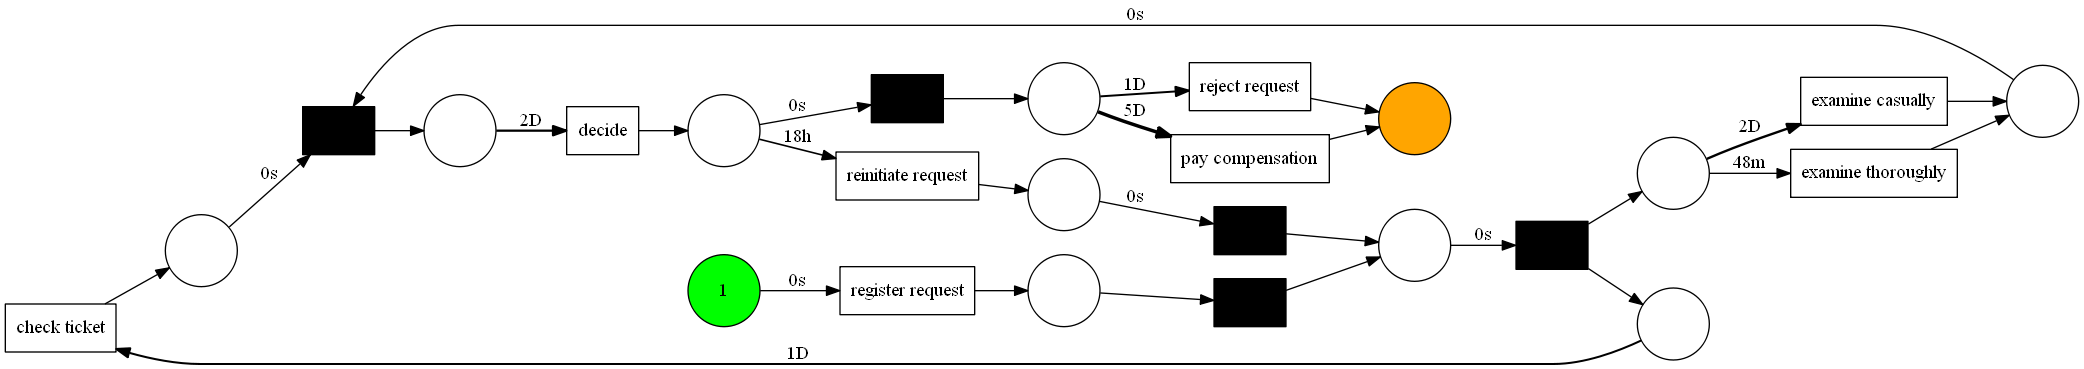

In [14]:
# perform a visualization of the Petri net that is discovered (PERFORMANCE!)
from pm4py.visualization.petrinet import factory as pn_vis_factory
gviz = pn_vis_factory.apply(net, im, fm, variant="performance", log=log)
pn_vis_factory.view(gviz)

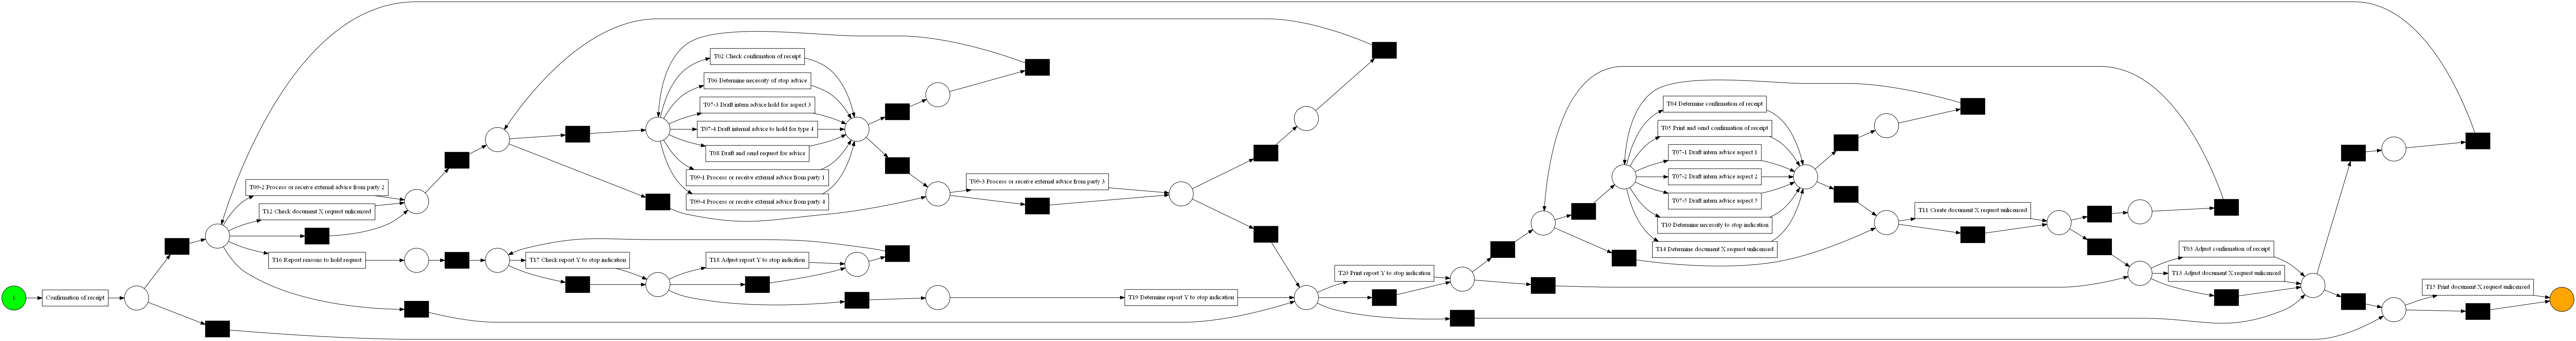

In [15]:
# try to discover a model from more complex log
from pm4py.objects.log.importer.xes import factory as xes_importer
log = xes_importer.apply(file_path + "\\receipt.xes")
from pm4py.algo.discovery.inductive import factory as inductive_miner
# discover a model with perfect fitness from such a log
net, im, fm = inductive_miner.apply(log)
# get a visualization
from pm4py.visualization.petrinet import factory as pn_vis_factory
gviz = pn_vis_factory.apply(net, im, fm)
pn_vis_factory.view(gviz)

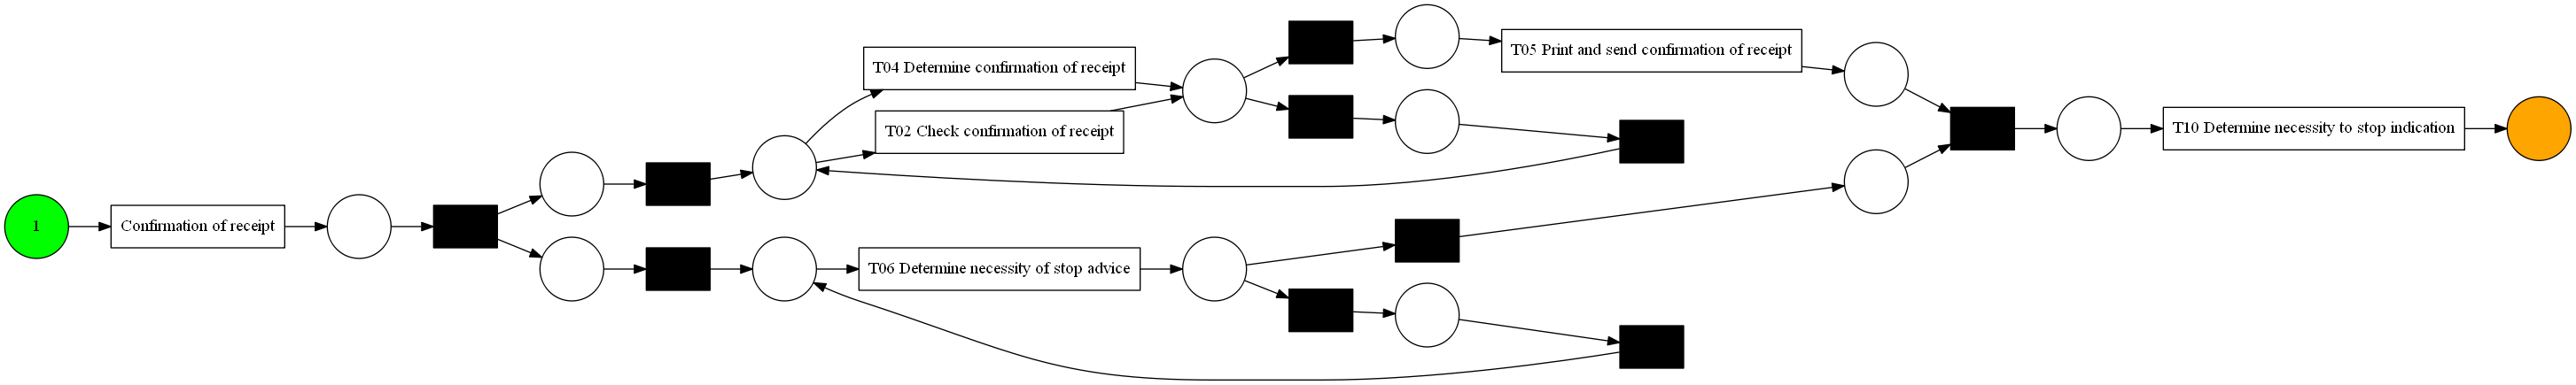

In [16]:
# apply automatic filtering!
# get a log with only mainstream behavior
from copy import deepcopy
from pm4py.algo.filtering.log.auto_filter import auto_filter
filtered_log = auto_filter.apply_auto_filter(deepcopy(log))
# discover a model, on the filtered log, that is simpler
from pm4py.algo.discovery.inductive import factory as inductive_miner
net, im, fm = inductive_miner.apply(filtered_log)
from pm4py.visualization.petrinet import factory as pn_vis_factory
gviz = pn_vis_factory.apply(net, im, fm)
pn_vis_factory.view(gviz)

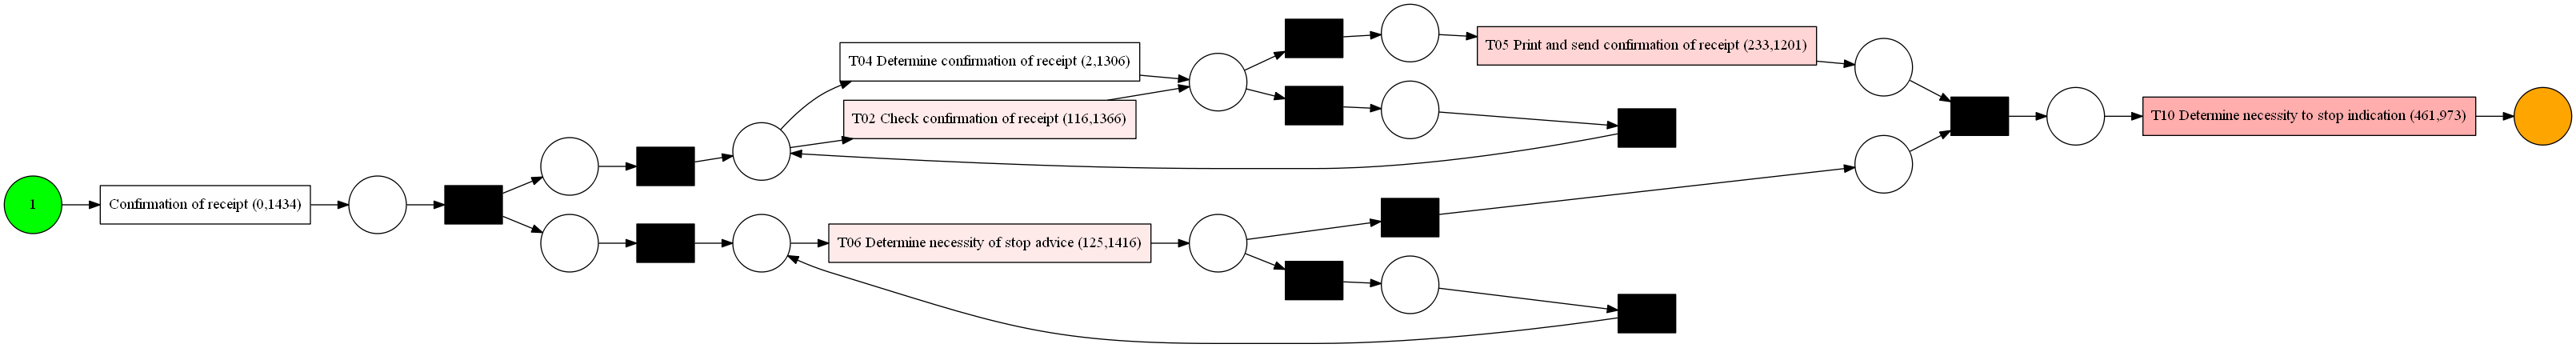

In [17]:
# this model is not perfectly fit according to the original log!
# see where deviations are
from pm4py.algo.conformance.alignments import factory as align_factory
alignments = align_factory.apply(log, net, im, fm, parameters={"ret_tuple_as_trans_desc": True})
from pm4py.visualization.petrinet.util import alignments_decoration
decorations = alignments_decoration.get_alignments_decoration(net, im, fm, log=log)
from pm4py.visualization.petrinet import factory as pn_vis_factory
gviz = pn_vis_factory.apply(net, im, fm, aggregated_statistics=decorations, variant="alignments")
pn_vis_factory.view(gviz)

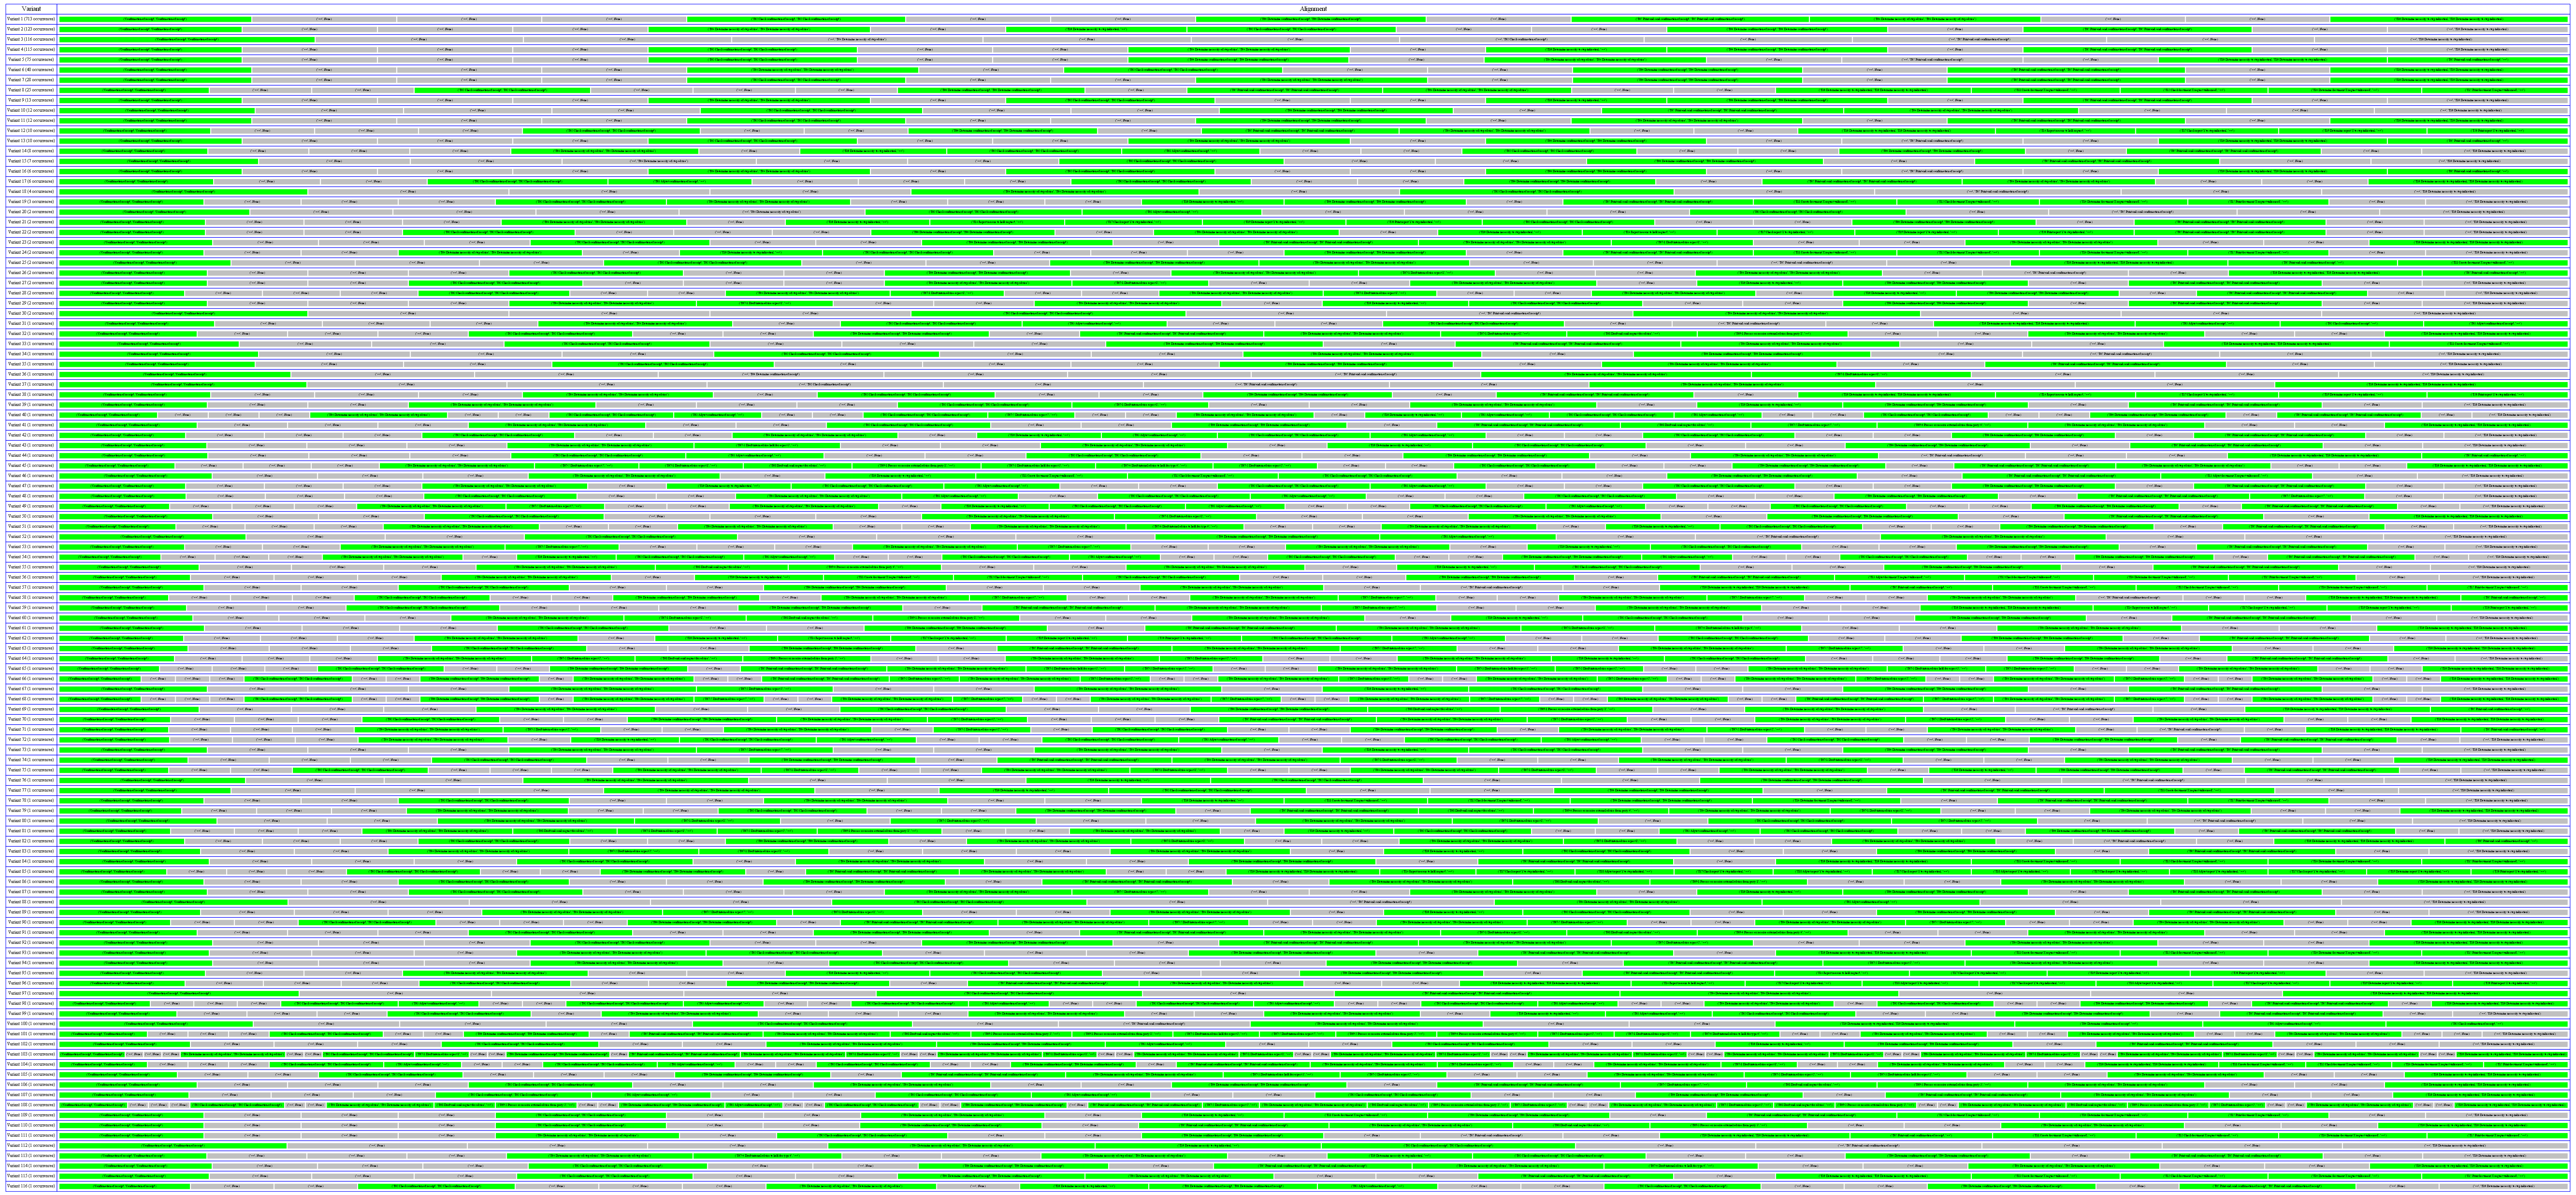

In [18]:
# get also the alignments table! :)
from pm4py.visualization.align_table import factory as align_table_factory
gviz = align_table_factory.apply(log, alignments)
align_table_factory.view(gviz)

In [19]:
# we have also token-based replay!
# with diagnostics
from pm4py.algo.conformance.tokenreplay import factory as token_based_replay
parameters_tbr = {"disable_variants": True, "enable_pltr_fitness": True}
replayed_traces, place_fitness, trans_fitness, unwanted_activities = token_based_replay.apply(log, net,
                                                                                              im,
                                                                                              fm,
                                                                                              parameters=parameters_tbr)

In [20]:
# THROUGHPUT ANALYSIS ON UNFIT EXECUTION OF TRANSITIONS
from pm4py.algo.conformance.tokenreplay.diagnostics import duration_diagnostics
trans_diagnostics = duration_diagnostics.diagnose_from_trans_fitness(log, trans_fitness)
for trans in trans_diagnostics:
    print(trans, trans_diagnostics[trans])

T10 Determine necessity to stop indication {'n_fit': 871, 'n_underfed': 412, 'fit_median_time': 681.958, 'underfed_median_time': 159874.352, 'relative_throughput': 234.43430827118388}


In [21]:
# measure fitness (through token-based replay)
from pm4py.evaluation.replay_fitness import factory as rp_fitness_factory
fitness = rp_fitness_factory.apply(log, net, im, fm)
print(fitness)

{'percFitTraces': 55.36959553695955, 'averageFitness': 0.8705654043268561}


In [22]:
# measure precision (through a variant of the ETConformance algorithm)
from pm4py.evaluation.precision import factory as precision_factory
precision = precision_factory.apply(log, net, im, fm)
print(precision)

0.6476842970676897


In [23]:
# measure generalization (through Bujis technique)
from pm4py.evaluation.generalization import factory as generalization_factory
generalization = generalization_factory.apply(log, net, im, fm)
print(generalization)

0.9635487572575434


In [24]:
# measure simplicity (through arc degree)
from pm4py.evaluation.simplicity import factory as simplicity_factory
simplicity = simplicity_factory.apply(net)
print(simplicity)

0.8378378378378379


In [25]:
# export the Petri net
from pm4py.objects.petri.exporter import factory as petri_exporter
petri_exporter.apply(net, im, "net.pnml", final_marking=fm)

In [26]:
# SIMPLE MINER: discover a workflow net without invisible transitions
from pm4py.algo.discovery.simple.model.log import factory as simple_discovery_factory
net, im, fm = simple_discovery_factory.apply(filtered_log, classic_output=True)
from pm4py.visualization.petrinet import factory as pn_vis_factory
gviz = pn_vis_factory.apply(net, im, fm)
pn_vis_factory.view(gviz)

ModuleNotFoundError: No module named 'pm4py.algo.discovery.simple'

In [27]:
# gets a map of the stochastic transitions that best approximate the replayed times passed
# between the activities
from pm4py.objects.stochastic_petri import map as stochastic_map
smap = stochastic_map.get_map_from_log_and_net(log, net, im, fm)
print(smap)

ImportError: cannot import name 'map' from 'pm4py.objects.stochastic_petri' (C:\Users\WENDY\AppData\Roaming\Python\Python37\site-packages\pm4py\objects\stochastic_petri\__init__.py)

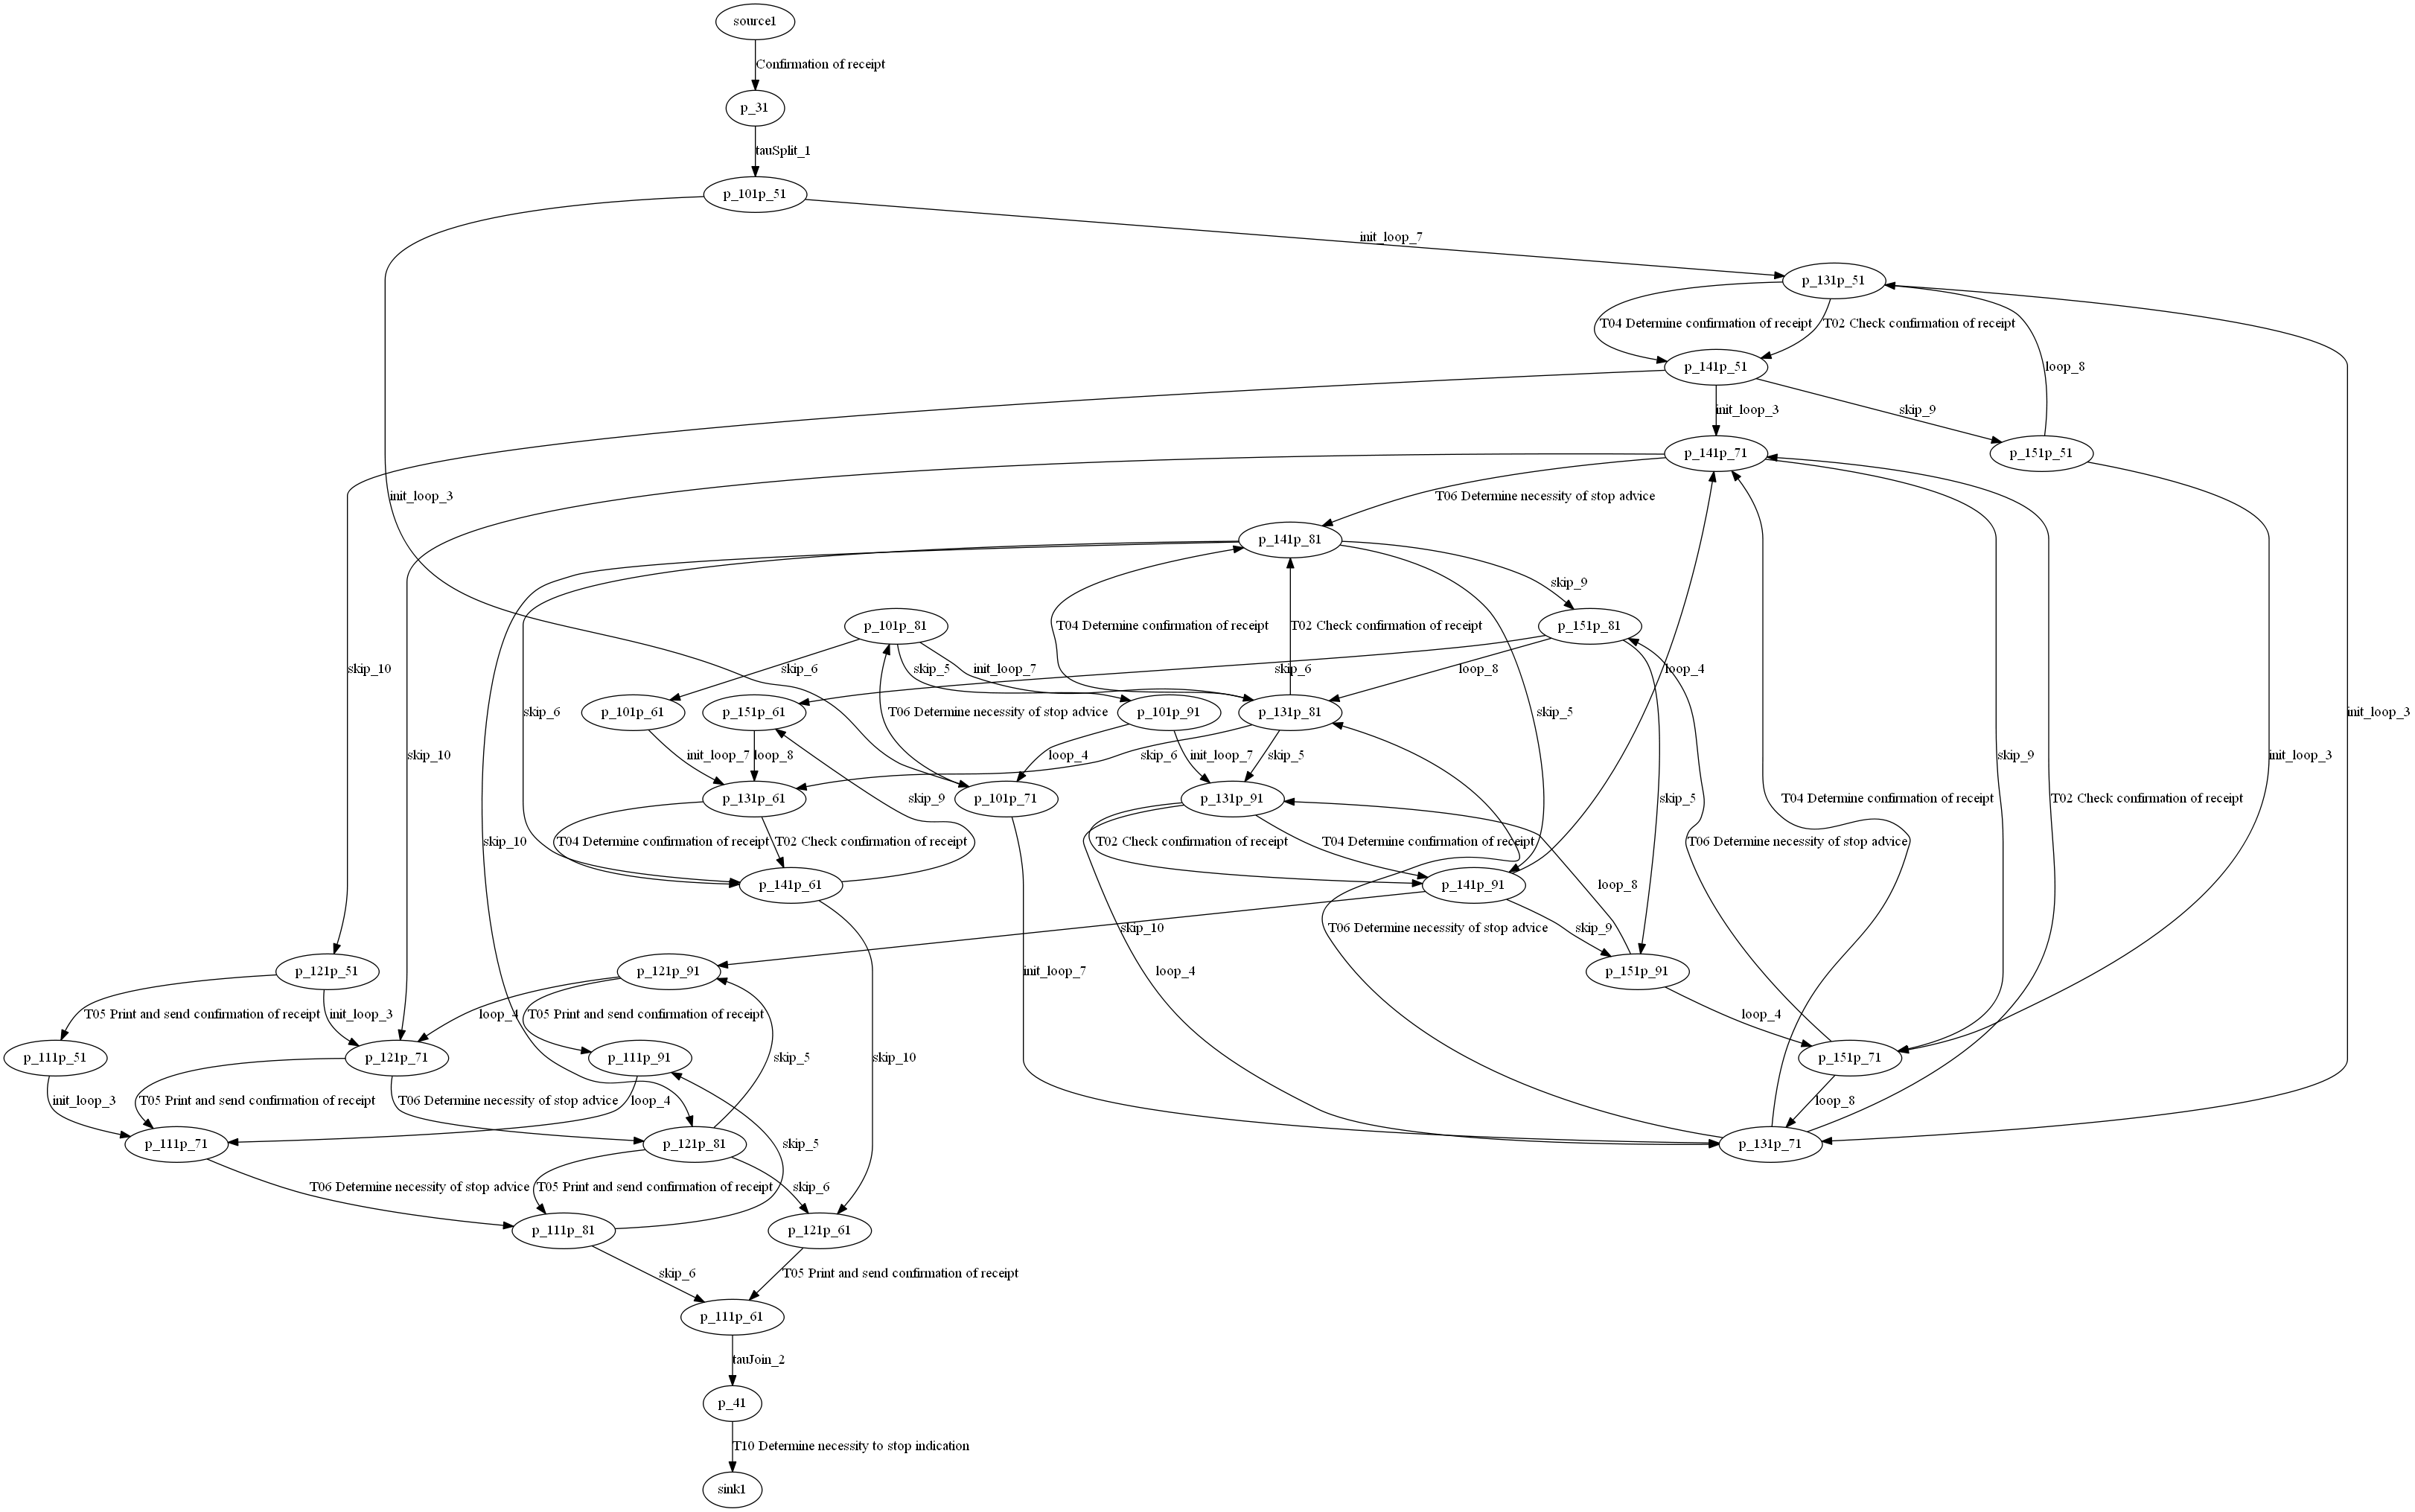

In [28]:
# construct the reachability graph
from pm4py.objects.petri.reachability_graph import construct_reachability_graph
reachab_graph = construct_reachability_graph(net, im)
from pm4py.visualization.transition_system import factory as ts_vis_factory
gviz = ts_vis_factory.apply(reachab_graph)
ts_vis_factory.view(gviz)

In [29]:
# perform transient analysis with Continuous Time Markov Chains (from the initial state, after a delay of 86400 s)
from pm4py.objects.stochastic_petri import ctmc
tang_reach_graph, probabilities, color_dictionary = ctmc.transient_analysis_from_log(log, 6*86400)
viz = ts_vis_factory.apply(tang_reach_graph, parameters={"format": "png",
                                                             "force_names": probabilities,
                                                             "fillcolors": color_dictionary})
ts_vis_factory.view(viz)

AttributeError: module 'pm4py.objects.stochastic_petri.ctmc' has no attribute 'transient_analysis_from_log'